In [1]:
import pandas as pd
import time
import random
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report,recall_score,precision_score,roc_auc_score
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegresor
from sklearn.ensemble import RandomForestClassifier  # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier #Adaptive Boost
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boost 
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from IPython.display import Image  
from sklearn.tree import export_graphviz
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\kisho\DataScience\Machine Learning\Practice\cat3.csv")

In [3]:
data.head()

,Unnamed: 0,package_id,online_booking,mobile_site_booking,Car_Cancellation,from_month,from_datee,weekend,timeOfDay,timeDifference,cancel_zone
0,8,2.0,0,0,0,1,1,0,3,7,1
1,20,2.0,0,0,0,1,1,0,3,2,1
2,23,1.0,0,0,0,1,1,0,3,2,1
3,34,1.0,1,0,0,1,1,0,4,3,1
4,47,2.0,0,0,0,1,2,0,6,-16,1


In [4]:
data = data.drop('Unnamed: 0',axis=1)
data.head(3)

,package_id,online_booking,mobile_site_booking,Car_Cancellation,from_month,from_datee,weekend,timeOfDay,timeDifference,cancel_zone
0,2.0,0,0,0,1,1,0,3,7,1
1,2.0,0,0,0,1,1,0,3,2,1
2,1.0,0,0,0,1,1,0,3,2,1


In [5]:
data.shape

(7550, 10)

In [6]:
data.columns

Index(['package_id', 'online_booking', 'mobile_site_booking',
       'Car_Cancellation', 'from_month', 'from_datee', 'weekend', 'timeOfDay',
       'timeDifference', 'cancel_zone'],
      dtype='object')

In [7]:
X = data.loc[:,data.columns!='Car_Cancellation'].values
X

array([[  2.,   0.,   0., ...,   3.,   7.,   1.],
       [  2.,   0.,   0., ...,   3.,   2.,   1.],
       [  1.,   0.,   0., ...,   3.,   2.,   1.],
       ...,
       [  2.,   1.,   0., ...,   6., -12.,   0.],
       [  2.,   0.,   0., ...,   3.,   1.,   1.],
       [  1.,   0.,   0., ...,   4.,   4.,   1.]])

In [8]:
y = data['Car_Cancellation'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
print('Shape of features X:',X.shape)
print('Shape of target Y:',y.shape)


Shape of features X: (7550, 9)
Shape of target Y: (7550,)


In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 40)

In [11]:
print('Data of training features X :',x_train.shape)
print('Data of testing features X :',x_test.shape)
print('Data of training features Y :',y_train.shape)
print('Data of testing features X :',y_test.shape)

Data of training features X : (4530, 9)
Data of testing features X : (3020, 9)
Data of training features Y : (4530,)
Data of testing features X : (3020,)


In [12]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[  3.   1.   0. ...   3.   4.   1.]
 [  2.   1.   0. ...   2. -11.   1.]
 [  1.   0.   0. ...   4.   1.   0.]
 ...
 [  2.   1.   0. ...   2.   2.   1.]
 [  1.   1.   0. ...   2. -12.   1.]
 [  2.   1.   0. ...   2. -14.   1.]]
[[  4.   1.   0. ...   1. -13.   0.]
 [  4.   0.   0. ...   6. -15.   1.]
 [  1.   0.   0. ...   4.   6.   0.]
 ...
 [  1.   0.   0. ...   4.   4.   1.]
 [  1.   0.   0. ...   2.   2.   0.]
 [  2.   1.   0. ...   1. -10.   0.]]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [13]:
# Using Standard Scalar
std_scaler = StandardScaler()

In [14]:
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [15]:
print(x_train)
print(x_test)

[[ 0.68398718  1.62796868 -0.15848913 ...  0.44692414  0.8560775
   0.69672522]
 [-0.00825186  1.62796868 -0.15848913 ... -0.40444943 -1.22225564
   0.69672522]
 [-0.7004909  -0.61426243 -0.15848913 ...  1.29829772  0.44041087
  -1.33819756]
 ...
 [-0.00825186  1.62796868 -0.15848913 ... -0.40444943  0.57896642
   0.69672522]
 [-0.7004909   1.62796868 -0.15848913 ... -0.40444943 -1.36081118
   0.69672522]
 [-0.00825186  1.62796868 -0.15848913 ... -0.40444943 -1.63792227
   0.69672522]]
[[ 1.30692039  1.53478192 -0.17324446 ... -1.25502571 -1.51812548
  -1.3116551 ]
 [ 1.30692039 -0.65155836 -0.17324446 ...  2.96754296 -1.79360099
   0.7186875 ]
 [-0.71126586 -0.65155836 -0.17324446 ...  1.27851549  1.09889189
  -1.3116551 ]
 ...
 [-0.71126586 -0.65155836 -0.17324446 ...  1.27851549  0.82341637
   0.7186875 ]
 [-0.71126586 -0.65155836 -0.17324446 ... -0.41051197  0.54794086
  -1.3116551 ]
 [-0.03853711  1.53478192 -0.17324446 ... -1.25502571 -1.10491221
  -1.3116551 ]]


In [16]:
# logistic Regression
model_logreg = LogisticRegression(random_state = 0)

In [17]:
model_logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred = model_logreg.predict(x_test)

In [19]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
Conf_matrix_logreg = confusion_matrix(y_test,y_pred)
Conf_matrix_logreg

array([[2877,   11],
       [ 128,    4]], dtype=int64)

<Axes: >

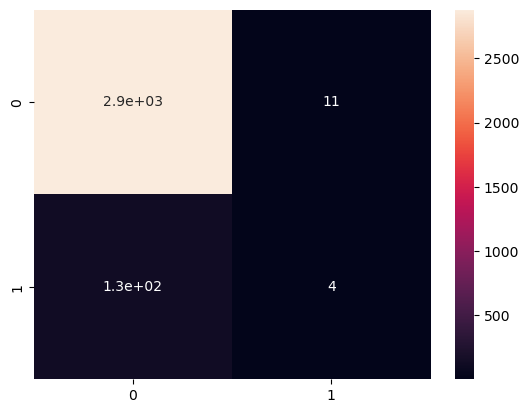

In [21]:
sns.heatmap(Conf_matrix_logreg,annot = True)

In [22]:
accuracy_logreg = metrics.accuracy_score(y_test,y_pred)
accuracy_logreg

0.9539735099337748

In [23]:
precision_logreg = metrics.precision_score(y_test,y_pred)
precision_logreg

0.26666666666666666

In [24]:
recall_logreg = metrics.recall_score(y_test,y_pred)
recall_logreg

0.030303030303030304

In [25]:
y_pred_proba = model_logreg.predict_proba(x_test)[::,1]
y_pred_proba

array([0.00659013, 0.07518252, 0.00154673, ..., 0.02423322, 0.0005969 ,
       0.00189977])

Text(0, 0.5, 'TPR---->')

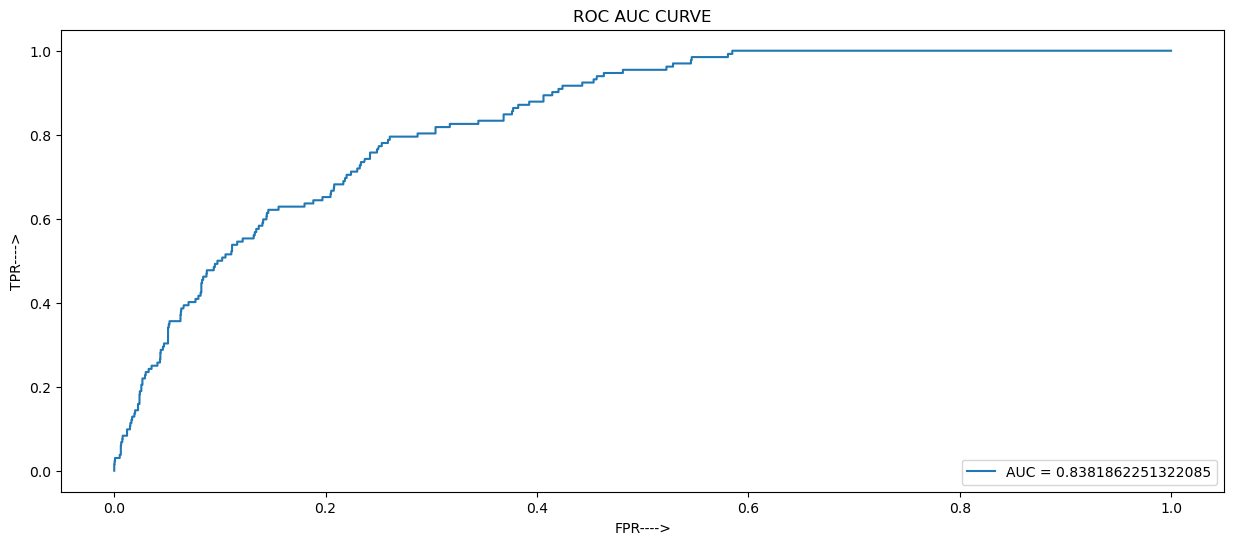

In [26]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.figure(figsize = (15,6))
plt.title("ROC AUC CURVE")
plt.plot(fpr,tpr,label = 'AUC = ' +str(auc))
plt.legend(loc = 4)
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')

In [53]:
# Decision Tree

model_dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt2.fit(x_train,y_train)

model_dt2_score_train = model_dt2.score(x_train,y_train)

model_dt2_score_test = model_dt2.score(x_test,y_test)

print('Training Score',model_dt2_score_train)

print('Testing Score',model_dt2_score_test)

Training Score 0.9571743929359824
Testing Score 0.9549668874172186


In [55]:
model_dt4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt4.fit(x_train,y_train)

model_dt4_score_train = model_dt4.score(x_train,y_train)

model_dt4_score_test = model_dt4.score(x_test,y_test)

print('Training Score',model_dt4_score_train)

print('Testing Score',model_dt4_score_test)

Training Score 0.9589403973509933
Testing Score 0.954635761589404


In [57]:
model_dt6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt6.fit(x_train,y_train)

model_dt6_score_train = model_dt6.score(x_train,y_train)

model_dt6_score_test = model_dt6.score(x_test,y_test)

print('Training Score',model_dt6_score_train)

print('Testing Score',model_dt6_score_test)

Training Score 0.9598233995584989
Testing Score 0.9536423841059603


In [59]:
model_dt8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt8.fit(x_train,y_train)

model_dt8_score_train = model_dt8.score(x_train,y_train)

model_dt8_score_test = model_dt8.score(x_test,y_test)

print('Training Score',model_dt8_score_train)

print('Testing Score',model_dt8_score_test)

Training Score 0.9618101545253863
Testing Score 0.9526490066225165


In [94]:
model_dt8 = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy')
model_dt8.fit(x_train,y_train)
y_pred_dt8 = model_dt8.predict(x_test)
y_pred_proba_dt8 = model_dt8.predict_proba(x_test)[:,1]

model_dt8_score_train = model_dt8.score(x_train,y_train)
model_dt8_score_test = model_dt8.score(x_test,y_test)

print('model_dt8_score_train: ',model_dt8_score_train)
print('model_dt8_score_test: ',model_dt8_score_test)

model_dt8_score_train:  0.9613686534216336
model_dt8_score_test:  0.954635761589404


In [96]:
#Confusion Metrics
con_matrix_dt = confusion_matrix(y_test,y_pred_dt8)
con_matrix_dt

array([[2869,   19],
       [ 118,   14]], dtype=int64)

<Axes: >

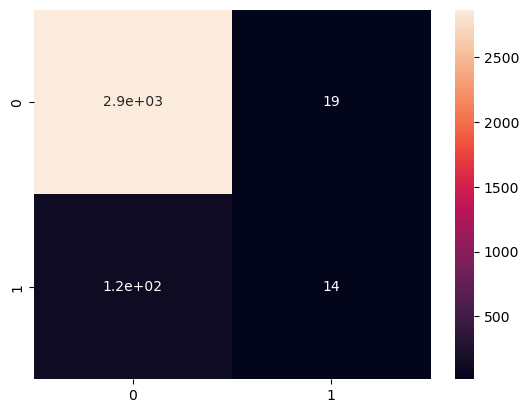

In [98]:
sns.heatmap(con_matrix_dt,annot = True)

In [100]:
accuracy_dt = metrics.accuracy_score(y_test,y_pred_dt8)
accuracy_dt

0.954635761589404

In [102]:
precision_dt = metrics.precision_score(y_test,y_pred_dt8)
precision_dt

0.42424242424242425

In [104]:
recall_dt = metrics.recall_score(y_test,y_pred_dt8)
recall_dt

0.10606060606060606

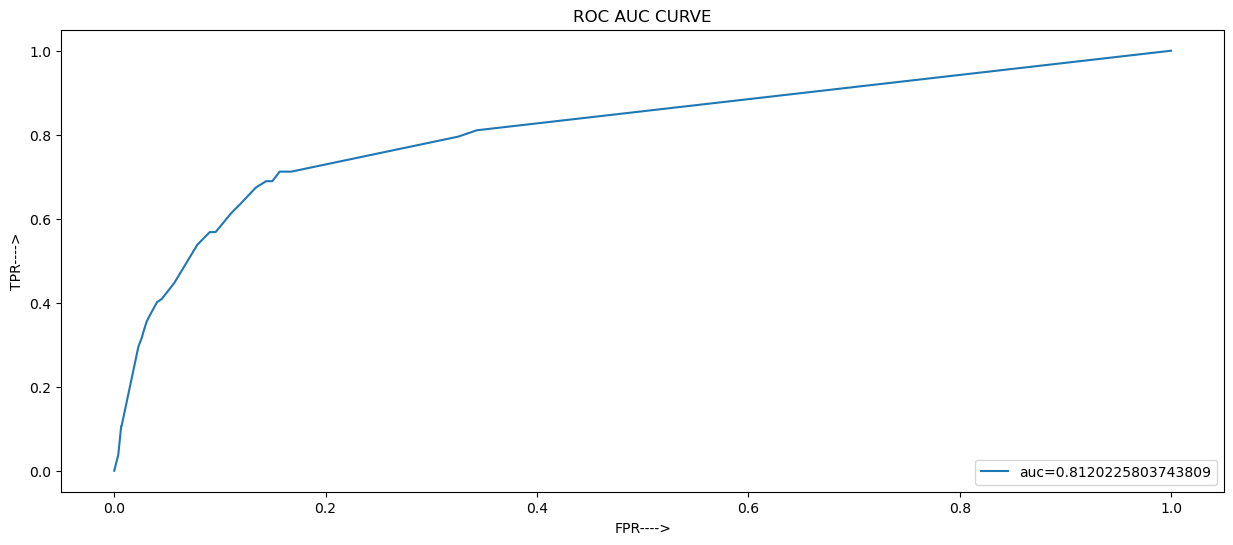

In [107]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba_dt8)
auc = metrics.roc_auc_score(y_test,y_pred_proba_dt8)
plt.figure(figsize = (15,6))
plt.plot(fpr,tpr,label = 'auc='+str(auc))
plt.legend(loc=4)
plt.title('ROC AUC CURVE')
plt.xlabel('FPR---->')
plt.ylabel('TPR---->')
plt.show()